# feature engineering & pre-processing

The purpose of this notebook will be to engineer features based off of the original credit card data set.

In [51]:
## install dependancies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler

In [30]:
# import data set
cc = pd.read_parquet('../data/creditcard.parquet')

display(cc)

,class,time,amount,v1,v2,v3,v4,v5,v6,v7,...,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28
0,False,0,149.619995,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,False,0,2.690000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,False,1,378.660004,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,False,1,123.500000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,False,2,69.989998,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,...,0.803487,0.408542,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,172786,0.770000,-11.881118,10.071785,-9.834784,-2.066656,-5.364473,-2.606837,-4.918215,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,False,172787,24.790001,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,False,172788,67.879997,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,False,172788,10.000000,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


## additional time features

We are going to do a basic break down of the time componenent as part of our feature generation.

In [48]:
# create copy of data frame
cc2 = cc.copy()

# rename time columns as seconds for specificity 
cc2["seconds"] = cc2["time"]

# extract minutes, hours, and days
cc2["minutes"] = cc2["seconds"] // 60
cc2["hours"] = cc2["minutes"] // 60
cc2["day"] = cc2["hours"] // 24

# extact minute and seconds as categoricals
cc2["minute"] = cc2["minutes"] - cc2["hours"] * 60
cc2["hour"] = cc2["hours"] - cc2["day"] * 24

# convert minute and hour to categorical data type
cc2["minute"] = cc2["minute"].astype("category")
cc2["hour"] = cc2["hour"].astype("category")

# remove time, minutes, and hours from the data set
cc2 = cc2.drop(columns=["time", "minutes", "hours"])

display(cc2)

,class,amount,v1,v2,v3,v4,v5,v6,v7,v8,...,v23,v24,v25,v26,v27,v28,seconds,day,minute,hour
0,False,149.619995,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0,0,0
1,False,2.690000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0,0,0
2,False,378.660004,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1,0,0,0
3,False,123.500000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1,0,0,0
4,False,69.989998,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,0.770000,-11.881118,10.071785,-9.834784,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,172786,1,59,23
284803,False,24.790001,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,172787,1,59,23
284804,False,67.879997,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,172788,1,59,23
284805,False,10.000000,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,172788,1,59,23


For this specific use case, I doubt that the time series feature breakdown will be of much use, but using the same criteria we used in the data discovery, it does virtually no harm in leaving them in. We know that the variables will have a high level of distinctness and that they are fully populating, the only check reamining is that the variables are not overly correleated, which we are about to confirm. Generally speaking, where there is any pattern contain time series data, it is good to do some kind of breakdown of the time element in order to catch seasonal effects. Exactly how to break down the data and whether to use categorical or continuous variables is situationlly dependant. Now let's check to see 

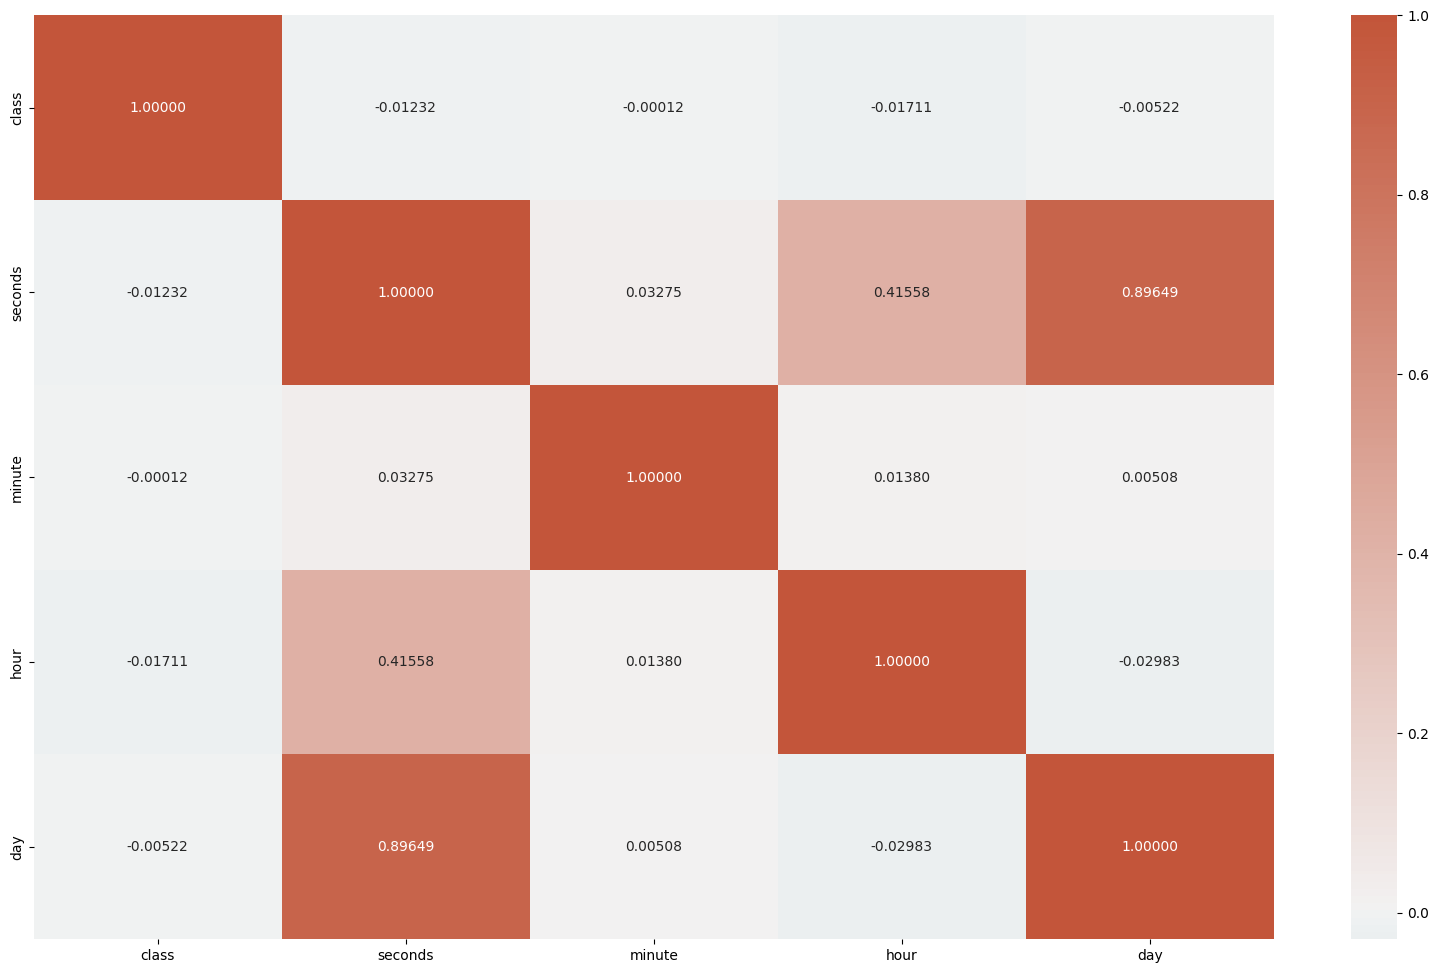

In [49]:
# plot correlation matrix
plt.figure(figsize=(20, 12))

# Create a custom colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plot the heatmap with the custom colormap
sns.heatmap(cc2[["class", "seconds", "minute", "hour", "day"]].corr(), annot=True, cmap=cmap, center=0, fmt=".5f")

# Display the plot
plt.show()

In [44]:
# show distinct values of day and counts
display(cc2["day"].value_counts())

day
0    144786
1    140021
Name: count, dtype: int64

We can see how that, not surprisingle, the day value is highly correlated with the time value. With that information, plus the fact that are only 2 values for day, we can go ahead and drop that column and keep hour and minute. There are many othere methods for generating featurs based off of time series data, but for this analysis (and given the low linear correlation) we will move on for now.

In [50]:
# drop day column
cc2 = cc2.drop(columns=["day"])

## scaling

The only only pre-processing we are going to do before running our models will now be scaling the time and amount features. As mentioned in data dsicovery, that PCA compenents all have realtively similar distributions and magnitudes, but the amount and time variable have vastly greater absolute magnitudes. 

We are going to use two different scaling operations for our data set. For the seconds data, we are going to use the sklearn StandardScaler, and for the amount data we are going to use the sklearn RobustScaler. The RobustScaler is needed for the amount field because the distribution has a very long right tail and many outliers on the high side of the data.

In [53]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

cc2["scaled_amount"] = rob_scaler.fit_transform(cc2["amount"].values.reshape(-1, 1))
cc2["scaled_seconds"] = std_scaler.fit_transform(cc2["seconds"].values.reshape(-1, 1))

display(cc2[["scaled_amount", "scaled_seconds"]])

,scaled_amount,scaled_seconds
0,1.783274,-1.996583
1,-0.269825,-1.996583
2,4.983721,-1.996562
3,1.418291,-1.996562
4,0.670579,-1.996541
...,...,...
284802,-0.296653,1.641931
284803,0.038986,1.641952
284804,0.641095,1.641974
284805,-0.167680,1.641974


Now, let's look at our new distributions and compare them to some of the PCA compenents.

,scaled_amount,scaled_seconds,v1,v2,v3
count,284807.000000,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05
mean,0.927124,-3.065637e-16,1.339397e-08,0.000000,-4.800400e-08
std,3.495006,1.000002e+00,1.958696e+00,1.651309,1.516255e+00
min,-0.307413,-1.996583e+00,-5.640751e+01,-72.715729,-4.832559e+01
25%,-0.229162,-8.552120e-01,-9.203734e-01,-0.598550,-8.903648e-01
50%,0.000000,-2.131453e-01,1.810880e-02,0.065486,1.798463e-01
75%,0.770838,9.372174e-01,1.315642e+00,0.803724,1.027196e+00
max,358.683167,1.642058e+00,2.454930e+00,22.057730,9.382559e+00


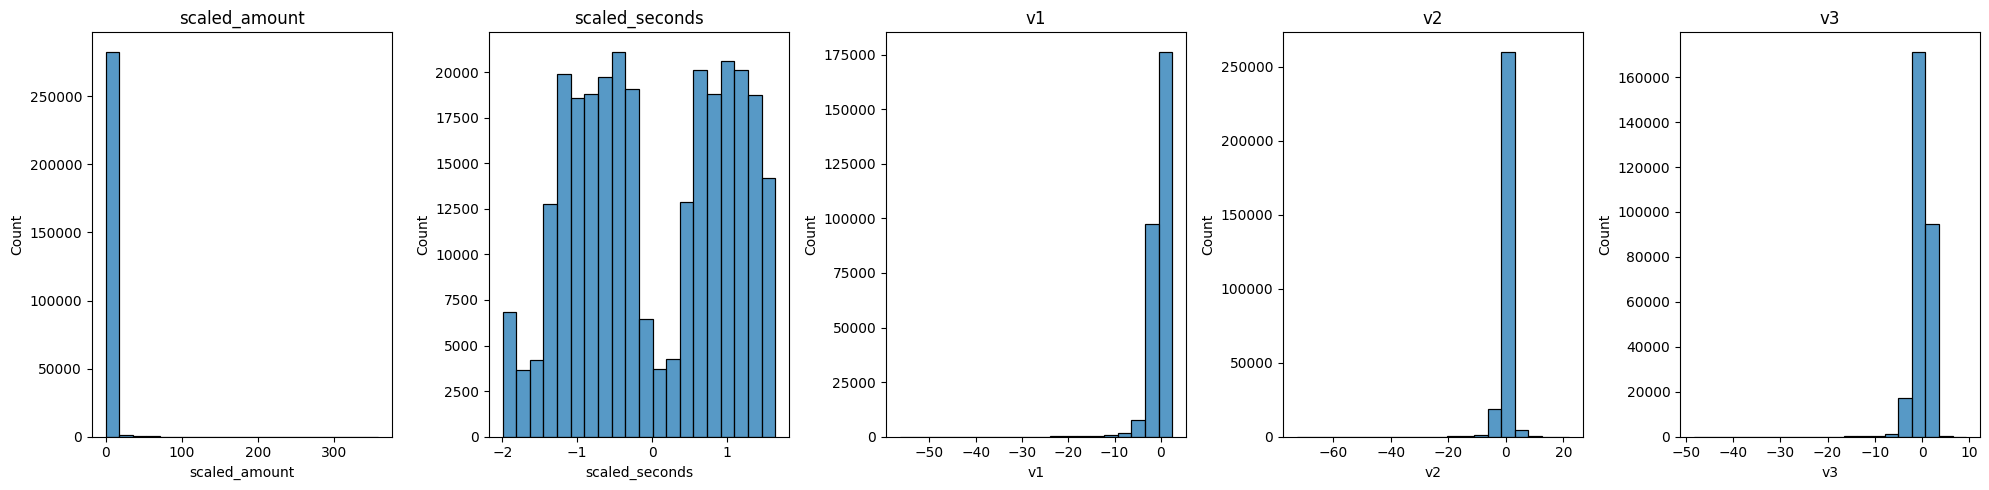

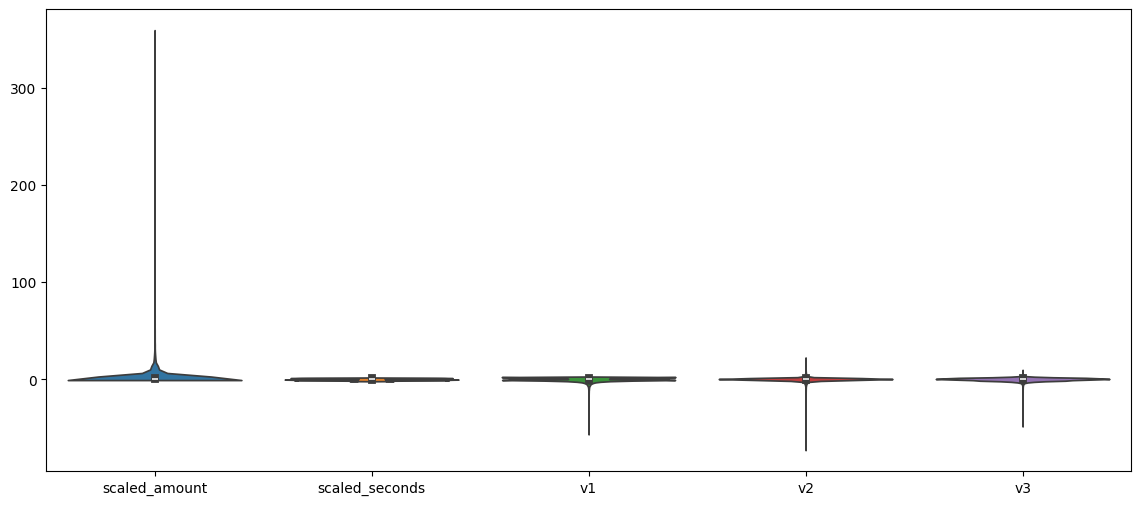

In [54]:
summary_stats = cc2[["scaled_amount", "scaled_seconds", "v1", "v2", "v3" ]].describe()
display(summary_stats)

# display historgram
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i, col in enumerate(cc2[["scaled_amount", "scaled_seconds", "v1", "v2", "v3" ]].columns):
    sns.histplot(cc2[["scaled_amount", "scaled_seconds", "v1", "v2", "v3" ]][col].dropna(), ax=axes[i], bins=20)  
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

# display violing plots
plt.figure(figsize=(14, 6)) 
sns.violinplot(data=cc2[["scaled_amount", "scaled_seconds", "v1", "v2", "v3" ]])
plt.show()

Although the max value for scaled_amount is still looks a little high at 358.683167, this is a few orders of magnitude smaller than the origanal value of 25691.160156 and we are good to move on.

Feature generation is it's entire own field of data science, with countless methods to choose from. Given that proper feature generation was most liekly conducted as an input to the PCA analysis and that we have examined and scaled our features to remove any likely source of error, I think we are good to move on. We will not save our engineering dataset for to use with our model tesiting in the next notebook.

In [56]:
cc2.to_parquet('../data/creditcard2.parquet', engine='pyarrow')